In [8]:
import sys

In [9]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import curvedsky as cs

In [44]:
sys.path.append('../')
Tcmb  = (2.726e6)**2
tcmb = 2.726e6

In [11]:
from utils import camb_clfile

In [12]:
cl_unl = camb_clfile('/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lenspotential.dat')

In [13]:
import curvedsky as cs

In [25]:
np.random.seed(11111)
plm = hp.synalm(cl_unl['pp']/Tcmb,lmax=1024)

In [32]:
pmap = hp.alm2map(plm,nside=512)

In [33]:
clpp = cl_unl['pp'][:1025]/Tcmb
cltt = cl_unl['tt'][:1025]/Tcmb
cltp = cl_unl['tp'][:1025]/Tcmb

In [34]:
Plm = cs.utils.hp_map2alm(512,1024,1024,pmap)
tlm = cs.utils.gauss2alm_const(1024,clpp,cltt,cltp,Plm)

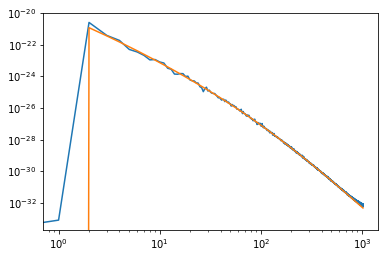

In [35]:
plt.loglog(cs.utils.alm2cl(1024,tlm[0]))
plt.loglog(clpp)

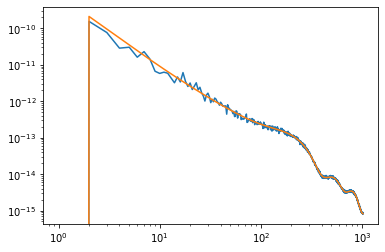

In [36]:
plt.loglog(cs.utils.alm2cl(1024,tlm[1]))
plt.loglog(cltt)

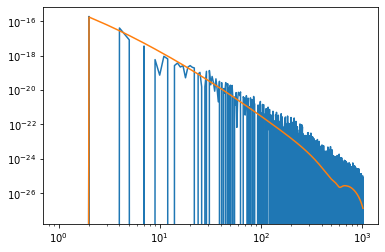

In [37]:
plt.loglog(cs.utils.alm2cl(1024,tlm[1],Plm))
plt.loglog(cltp)

In [50]:
tlm[0].shape

(1025, 1025)

In [38]:
import os

In [39]:
fname = "/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/MASS/phi_sims_0000.fits"

In [41]:
phi_lm = hp.read_alm(fname)
phi_map = hp.alm2map(phi_lm,nside=512)

In [45]:
Phi_lm = cs.utils.hp_map2alm(512,1024,1024,phi_map/tcmb)
t_lm = cs.utils.gauss2alm_const(1024,clpp,cltt,cltp,Phi_lm)

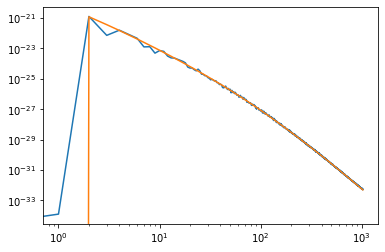

In [46]:
plt.loglog(cs.utils.alm2cl(1024,t_lm[0]))
plt.loglog(clpp)

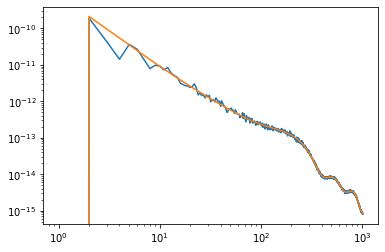

In [47]:
plt.loglog(cs.utils.alm2cl(1024,t_lm[1]))
plt.loglog(cltt)

(0.0, 20.0)

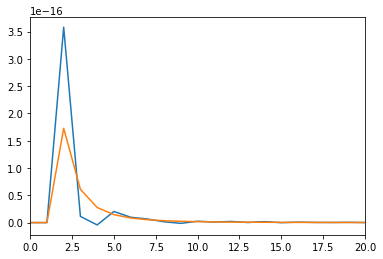

In [50]:
plt.plot(cs.utils.alm2cl(1024,t_lm[1],Phi_lm))
plt.plot(cltp)
plt.xlim(0,20)